In [1]:
# =============================================
# Auto data
# =============================================
#
# Summary: 
# Data used in the book:
#    "Data anlysis and data mining" by A.Azzalini and B.Scarpa,
#    © Oxford University Press, 2012 (ISBN 978-0-19-976710-6).
#
# Data obtained by manipulation of the data available at
# ftp://ftp.ics.uci.edu/pub/machine-learningdatabases/autos
#
# Data description: 
# The data set consists of the following 18 variables:
# Response variable:
#  city.distance: city distance covered (km/l)
# Covariates:
#  make:                manufacturer (factor, 22 levels)    
#  fuel.type:           type of engine fuel (factor, 2 levels: diesel, gasoline)   
#  aspiration:          type of engine aspiration (factor, 2 levels: standard, turbo)   
#  body.style:          type of body style (factor, 5 levels: hardtop, wagon, sedan, hatchback, convertible)  
#  drive.wheels:        type of drive wheels (factor,  3 levels: 4wd, fwd, rwd)   
#  engine.location:     location of engine (factor, 2 levels: front, rear)  
#  wheel.base:          distance between axes (cm)   
#  length:              length (cm)    
#  width:               width (cm)  
#  height:              height (cm)   
#  curb.weight:         weight (kg)   
#  engine.size:         engine size (l)   
#  compression.rate:    compression rate   
#  hp:                  horse power   
#  peak-rpm:            number of peak revolutions per minute   
#  highway.distance:    highway distance (km/l)  
#  n.cylinders:         number of cylinders
#
#======================================================

## Read the data
auto <- read.table("http://azzalini.stat.unipd.it/Book-DM/auto.dat", header = TRUE)

In [3]:
# fit additiv modell
install.packages('gam')
library(gam)

fit.gam <- gam(city.distance ~ s(engine.size) + s(curb.weight) + s(HP) + factor(aspiration), data=auto)


The downloaded binary packages are in
	/var/folders/dp/x5lf9lp142l0p7rp61v608h00000gn/T//Rtmpx4HYOw/downloaded_packages


Loading required package: splines

Loading required package: foreach

Loaded gam 1.22-5





Call: gam(formula = city.distance ~ s(engine.size) + s(curb.weight) + 
    s(HP) + factor(aspiration), data = auto)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-2.10416 -0.69656 -0.08216  0.55273  3.70562 

(Dispersion Parameter for gaussian family taken to be 0.9812)

    Null Deviance: 1576.211 on 202 degrees of freedom
Residual Deviance: 185.4381 on 188.9996 degrees of freedom
AIC: 587.7215 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                    Df Sum Sq Mean Sq F value    Pr(>F)    
s(engine.size)       1 735.50  735.50 749.625 < 2.2e-16 ***
s(curb.weight)       1 124.19  124.19 126.579 < 2.2e-16 ***
s(HP)                1 264.83  264.83 269.911 < 2.2e-16 ***
factor(aspiration)   1  19.38   19.38  19.755 1.498e-05 ***
Residuals          189 185.44    0.98                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
                   Npar Df Npar F     Pr(F)    


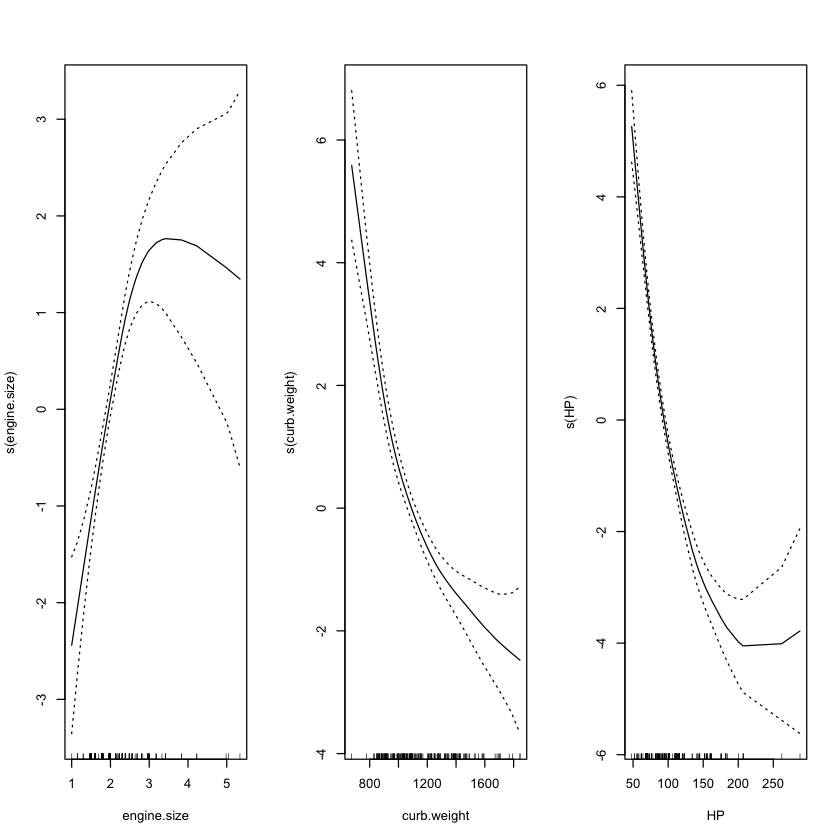

In [4]:
par(mfrow = c(1, 3), bg = "white")
plot(fit.gam, se = TRUE, terms = c("s(engine.size)", "s(curb.weight)", "s(HP)"))
summary(fit.gam)


In [5]:
# fit lm and compare
fit.lm <- lm(city.distance ~ engine.size + curb.weight + HP + factor(aspiration), data = auto)

In [11]:
summary(fit.lm) 
anova(fit.lm, fit.gam, test="F")


Call:
lm(formula = city.distance ~ engine.size + curb.weight + HP + 
    factor(aspiration), data = auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6622 -0.8694 -0.1820  0.6159  6.5805 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             20.9737380  0.5760001  36.413  < 2e-16 ***
engine.size              2.0906536  0.3440624   6.076  6.2e-09 ***
curb.weight             -0.0080725  0.0008942  -9.028  < 2e-16 ***
HP                      -0.0519338  0.0044512 -11.667  < 2e-16 ***
factor(aspiration)turbo  1.0121814  0.2942909   3.439 0.000711 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.413 on 198 degrees of freedom
Multiple R-squared:  0.7492,	Adjusted R-squared:  0.7441 
F-statistic: 147.9 on 4 and 198 DF,  p-value: < 2.2e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,198.0000,395.3196,NA,NA,NA,NA
2,188.9996,185.4381,9.000444,209.8814,23.76686,7.401423e-27


Her kan vi lese som at den uforklarte variasjonen (RSS) mer enn halveres når vi går fra lm til `gam`. F sier at forklaringskraft per frihetsgrad, altså at `gam` forklarer mye bedre samlet enn `lm`. Endelig sier $Pr(>F)$ at nullhypotesen om at `gam` ikke er bedre enn `lm` kan forkastes.